Download the Colour Lena image, call it fc 
 - convert fc to grayscale fg using 
    - Averaging of r,g,b 
    - Built-in function 
    - Display grayscale images and check if there is any difference 
- Resize fg by factor 2 using
    - Nearest Neighbor Interpolation (with and without Built-in function)
    - Bi-linear Interpolation (with and without Built-in function)
    - Bi-cubic interpolation (Using built-in function)  

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

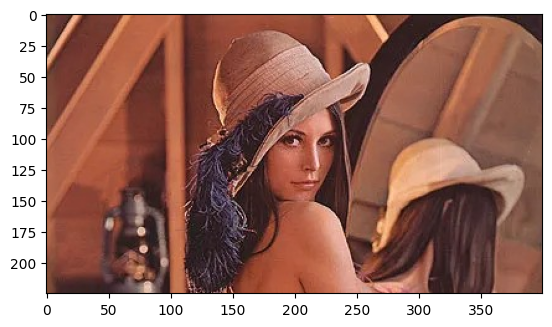

In [7]:
#load and display the image
fc = cv2.imread('lena_image.jpg')
#convert bgr to rgb 
fc = cv2.cvtColor(fc, cv2.COLOR_BGR2RGB)
plt.imshow(fc)

[[ -8.66666667  -8.66666667  -8.66666667 ...  -3.          -3.
   -3.        ]
 [ -8.66666667  -8.66666667  -8.66666667 ...  -3.          -3.
   -3.        ]
 [ -9.          -9.          -8.66666667 ...  -3.          -2.66666667
   -2.66666667]
 ...
 [-10.         -10.33333333 -10.         ...  -9.33333333 -10.66666667
  -11.        ]
 [-10.         -10.33333333 -10.         ... -10.33333333 -11.
  -11.        ]
 [-11.         -10.33333333 -10.         ... -10.66666667 -10.66666667
  -10.66666667]]


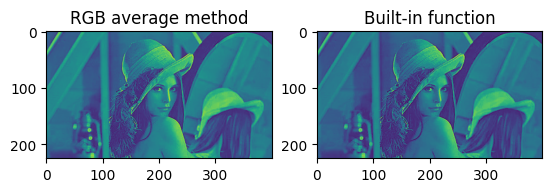

In [33]:
size = fc.shape

gray_image_1 = np.zeros(size[0:2])
for i in range(size[0]):
    for j in range(size[1]):
        gray_image_1[i][j] = np.mean(fc[i][j])

#Display image 
plt.subplot(121)
plt.imshow(gray_image_1)
plt.title('RGB average method')

plt.subplot(122)
gray_image_2 = cv2.cvtColor(fc, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image_2)
plt.title('Built-in function')

print(gray_image_2 - gray_image_1)
#Both the images are not same.